In [2]:
from qutip import *

In [3]:
import sys 
import os
sys.path.append(os.path.abspath("C:\Users\User\Documents\GitHub/colormap/"))
import colormaps as cmaps


In [4]:
import numpy as np
import scipy.constants as cs
import scipy.special as ss
from matplotlib import pyplot as plt
from matplotlib import cm
from qkit.qkit.gui.notebook.Progress_Bar import Progress_Bar as pb
from scipy.integrate import dblquad
from scipy import integrate

%matplotlib inline

In [67]:
#customized plots:
import matplotlib 
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
matplotlib.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (10.0,5.0)
matplotlib.rcParams['savefig.dpi'] = 100
matplotlib.rcParams['legend.shadow'] = True
matplotlib.rcParams['savefig.bbox'] = 'tight'


cmap_virdis = cmaps.viridis.colors


hfont = {'fontname':'Helvetica'}


In [6]:
labelsize = 27
ticksize = 20

In [7]:
mu_0 = cs.mu_0                                     #vacuum susceptiblity
mu_B = cs.physical_constants['Bohr magneton'][0]   #Bohr magneton in SI units
k_b = cs.k                                         #K boltzmann
e = cs.e                                           #electron charge
hbar = cs.hbar
h = cs.h
phi_0 = cs.physical_constants['mag. flux quantum'][0]
Rq = h/e**2.

In [8]:
def Harmonic_Oscillator(w,N):
    '''Harmonic oscillator Hamiltonian in the photn number eigenbase'''
    a = destroy(N)
    n = num(N)
    
    H = w * (n + 0.5)
    
    return Qobj(H)

In [9]:
def Kerr(K,N):
    '''Non-linear part of the Kerr Hamiltonian'''
    a = destroy(N)
    H = 0.5*K*a.dag()* a.dag() * a * a
    return Qobj(H)

In [10]:
def Kerr_SO(K,EJ,N):
    '''Higher order Non-linear part of the Kerr Hamiltonian'''
    a = destroy(N)
    H = (0.5*np.abs(K))**(3./2.) * np.sqrt(hbar*6./(20.*EJ)) * a.dag()* a.dag() * a.dag() * a * a * a
    return Qobj(H)   

In [11]:
def Kerr_hamilton(w,K, N):
    '''Harmonic oscialltor (frequency w) with Kerr non-linearity K
    in the photon number eigenbase'''
    a = destroy(N)
    n = num(N)
    
    H = w * (n+0.5) + 0.5*K * a.dag()* a.dag() * a * a
    
    return Qobj(H)

In [12]:
def Kerr_hamilton_SO(w,K, EJ,  N):
    '''Harmonic oscialltor (frequency w) with Kerr non-linearity K
    in the photon number eigenbase'''
    a = destroy(N)
    n = num(N)
    
    H = w * (n+0.5) + 0.5*K * a.dag()* a.dag() * a * a + (0.5*np.abs(K))**(3./2.) * np.sqrt(hbar*6./(20.*EJ)) * a.dag() * a.dag() * a.dag() * a * a * a 
    
    return Qobj(H)

In [13]:
NFock = 20

In [14]:
'''Capacitance and charging energy'''
C = 120.*10**-15
Ec = e**2./(2.*C)
print 'Ec = {} GHz'.format(Ec/hbar*10**-9)

Ec = 1.01422283587 GHz


In [15]:
'''Cavity frequency'''
wc = 2.*np.pi*7.*10**9

In [16]:
'''Kerr non-linearity'''
K = -wc*10**-2
print 'Kerr non-linearity: K = {} MHz'.format(K*10**-6)
EJ = 20.*Ec

Kerr non-linearity: K = -439.822971503 MHz


In [17]:
HOC = Harmonic_Oscillator(wc, NFock)
Hi = Kerr(K,NFock)
HiSO = Kerr_SO(K,EJ,NFock)
H_Kerr = Kerr_hamilton(wc, K, NFock)
H_Kerr_SO = Kerr_hamilton_SO(wc, K,EJ, NFock)

In [18]:
plot_energy_levels?

In [19]:
#fig_energy, axes = plt.subplots(figsize = (8,4))
#axes.set_ylabel(r'$\mathrm{energy}$')

In [20]:
label_HOC =list(['Harm. Osc','Kerr 1st','Kerr 2nd', 'level index']) 

In [21]:
label_HOC

['Harm. Osc', 'Kerr 1st', 'Kerr 2nd', 'level index']

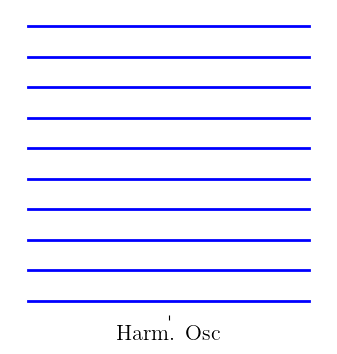

In [22]:
fig_en_specHO, axes = plot_energy_levels([HOC], N =10, labels = label_HOC, figsize=(4,4), show_ylabels = False);

In [23]:
#fig_en_specHO.savefig('energy_spec_HO.png', dpi = 200., bbox_to_anchor = 'tight')

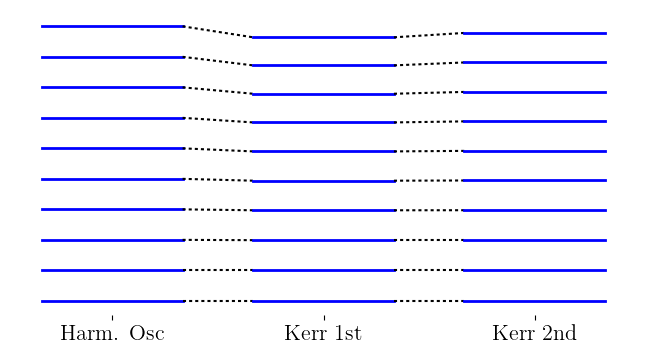

In [24]:
fig_en_spec, axes = plot_energy_levels([HOC, Hi, HiSO], N =10, labels = label_HOC, figsize=(8,4), show_ylabels = False);

In [25]:
#fig_en_spec.savefig('energy_spec.png', dpi = 200., bbox_to_anchor = 'tight')

In [26]:
EJEC = np.linspace(1,140,140)

In [27]:
#### Eigenenergies quantum harmonic oscillator
HO_energies = np.array([Harmonic_Oscillator(wc, NFock).eigenenergies() for E in EJEC])

#### Kerr nonlinearity equal to the charging energy (transmon limit)
Kerr_energies = np.array([Kerr_hamilton(wc,K,NFock).eigenenergies() for E in EJEC])

#### higher order non-linearity
Kerr_energies_SO = np.array([Kerr_hamilton_SO(wc,K,E*Ec,NFock).eigenenergies() for E in EJEC])


In [28]:
n = 10

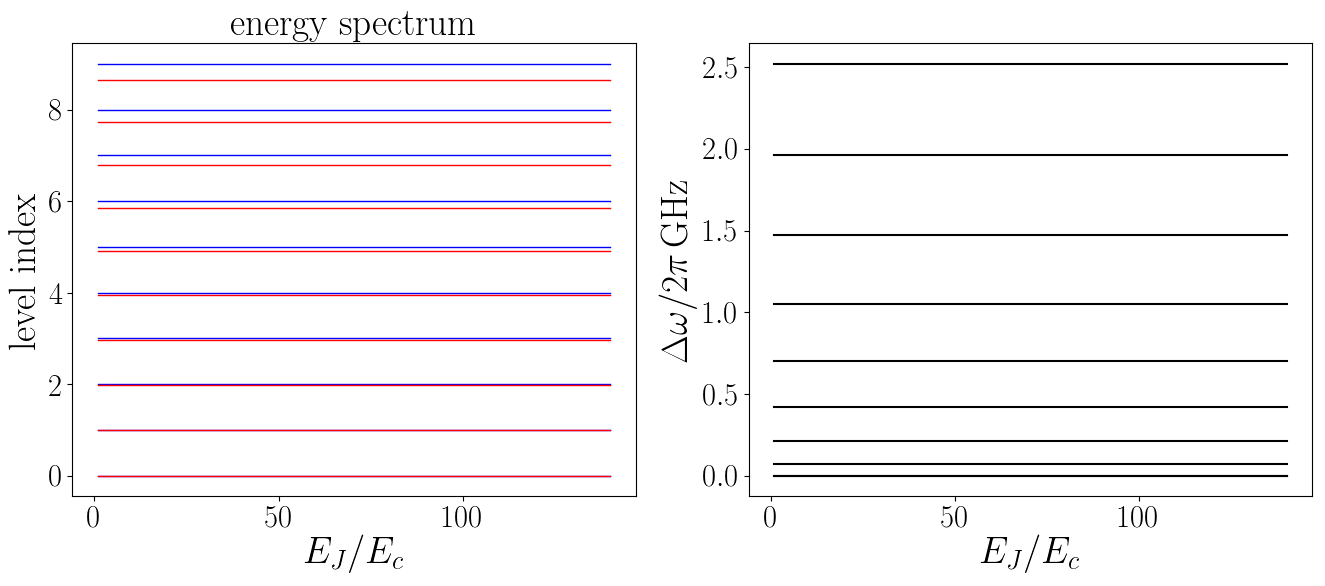

In [29]:
figEnergy, axes = plt.subplots(1,2, figsize = (16,6))
axes[0].set_title(r'energy spectrum', fontsize = labelsize)
axes[0].set_ylabel(r'level index',fontsize = labelsize)
axes[0].set_xlabel(r'$E_J /E_c$', fontsize = labelsize)
axes[1].set_xlabel(r'$E_J /E_c$', fontsize = labelsize)
axes[1].set_ylabel(r'$\Delta \omega / 2 \pi\,\mathrm{GHz}$', fontsize = labelsize)
for N in range(n):
    axes[0].plot(EJEC, (HO_energies[:,N]-HO_energies[:,0])/(2.*HO_energies[:,0]), color = 'blue', label = 'H.O.',  lw = 1.)
    axes[0].plot(EJEC, (Kerr_energies[:,N]-Kerr_energies[:,0])/(2.*HO_energies[:,0]), color = 'red', label = 'H.O. + Kerr', lw = 1.)
    axes[1].plot(EJEC, np.array(HO_energies[:,N]-Kerr_energies[:,N])/(2.*np.pi*10**9), color = 'black')
    #plt.plot(EJEC, hbar*Kerr_energies_SO[:,N], color = 'black')
    #plt.yscale('log')
#axes[0].legend()

In [30]:
K11 = np.linspace(wc*10**-4,wc*10**-2, 100)

In [31]:
#### Eigenenergies quantum harmonic oscillator
HO_energies_K = np.array([Harmonic_Oscillator(wc, NFock).eigenenergies() for K in K11])

#### Kerr nonlinearity equal to the charging energy (transmon limit)
Kerr_energies_K = np.array([Kerr_hamilton(wc,-K,NFock).eigenenergies() for K in K11])

#### higher order non-linearity
Kerr_energies_SO_K = np.array([Kerr_hamilton_SO(wc,-K,EJ,NFock).eigenenergies() for K in K11])


### first order correction

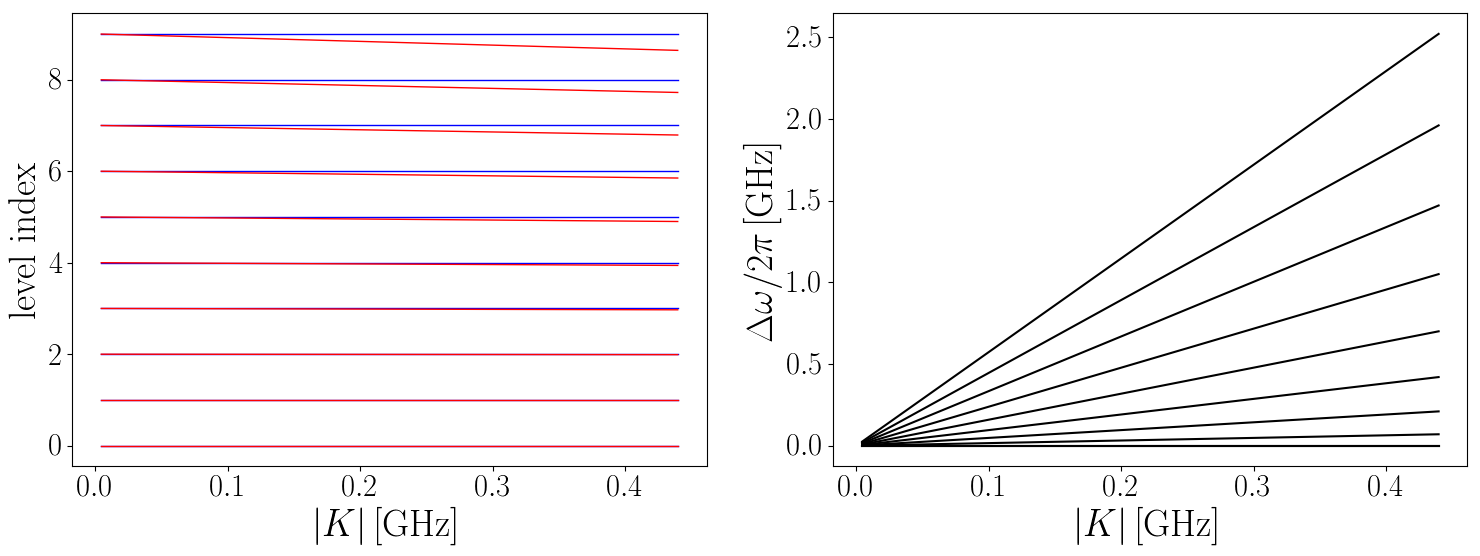

In [32]:
figEnergy_Kerr, axes = plt.subplots(1,2, figsize = (18,6))
#axes[0,0].set_title(r'energy spectrum', fontsize = labelsize)
axes[0].set_ylabel(r'level index',fontsize = labelsize)
axes[0].set_xlabel(r'$|K|\,\mathrm{[GHz]}$', fontsize = labelsize)
axes[1].set_xlabel(r'$|K|\,\mathrm{[GHz]}$', fontsize = labelsize)
axes[1].set_ylabel(r'$\Delta \omega / 2 \pi\,\mathrm{[GHz]}$', fontsize = labelsize)
for N in range(n):
    axes[0].plot(K11*10**-9, (HO_energies_K[:,N]-HO_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'blue', label = 'H.O.',  lw = 1.)
    axes[0].plot(K11*10**-9, (Kerr_energies_K[:,N]-Kerr_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'red', label = 'H.O. + Kerr', lw = 1.)
    axes[1].plot(K11*10**-9, np.array(HO_energies_K[:,N]-Kerr_energies_K[:,N])/(2.*np.pi*10**9), color = 'black')
    #plt.plot(EJEC, hbar*Kerr_energies_SO[:,N], color = 'black')
    #plt.yscale('log')
#axes[0].legend()



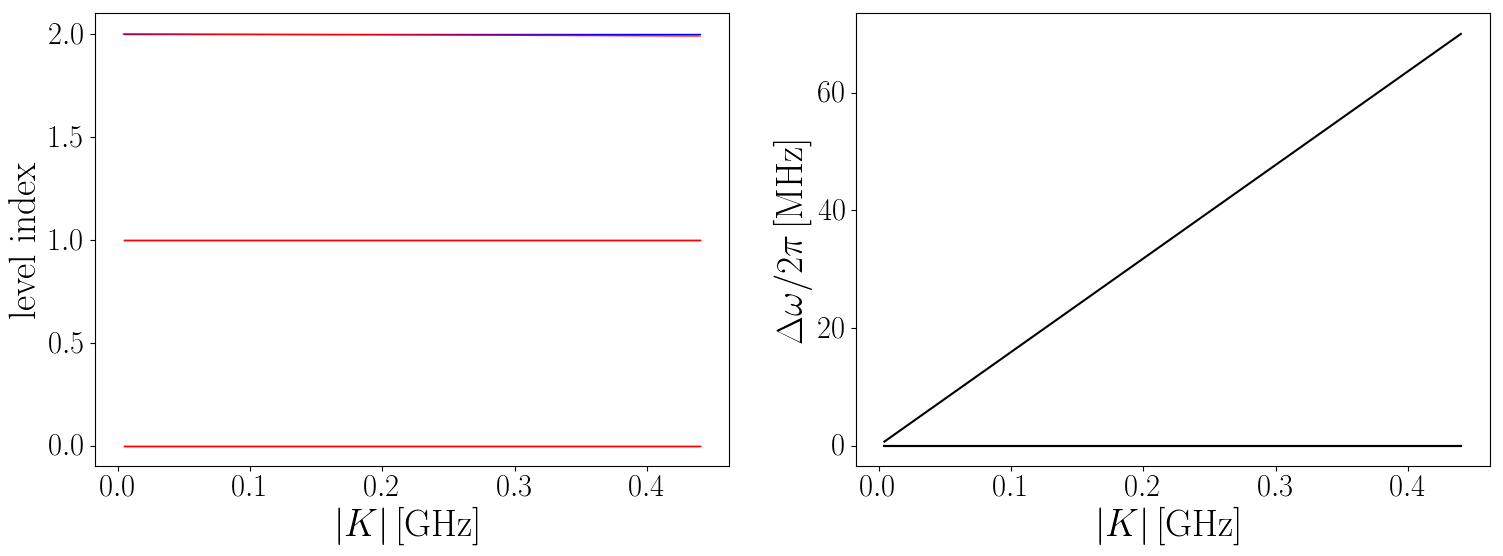

In [33]:
figEnergy_Kerr, axes = plt.subplots(1,2, figsize = (18,6))
#axes[0,0].set_title(r'energy spectrum', fontsize = labelsize)
axes[0].set_ylabel(r'level index',fontsize = labelsize)
axes[0].set_xlabel(r'$|K|\,\mathrm{[GHz]}$', fontsize = labelsize)
axes[1].set_xlabel(r'$|K|\,\mathrm{[GHz]}$', fontsize = labelsize)
axes[1].set_ylabel(r'$\Delta \omega / 2 \pi\,\mathrm{[MHz]}$', fontsize = labelsize)
for N in range(3):
    axes[0].plot(K11*10**-9, (HO_energies_K[:,N]-HO_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'blue', label = 'H.O.',  lw = 1.)
    axes[0].plot(K11*10**-9, (Kerr_energies_K[:,N]-Kerr_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'red', label = 'H.O. + Kerr', lw = 1.)
    axes[1].plot(K11*10**-9, np.array(HO_energies_K[:,N]-Kerr_energies_K[:,N])/(2.*np.pi*10**6), color = 'black')
    #plt.plot(EJEC, hbar*Kerr_energies_SO[:,N], color = 'black')
    #plt.yscale('log')
#axes[0].legend()



In [34]:
#figEnergy_Kerr.savefig('energy_Kerr.png', dpi = 200., bbox_to_anchor = 'tight')

### second order correction

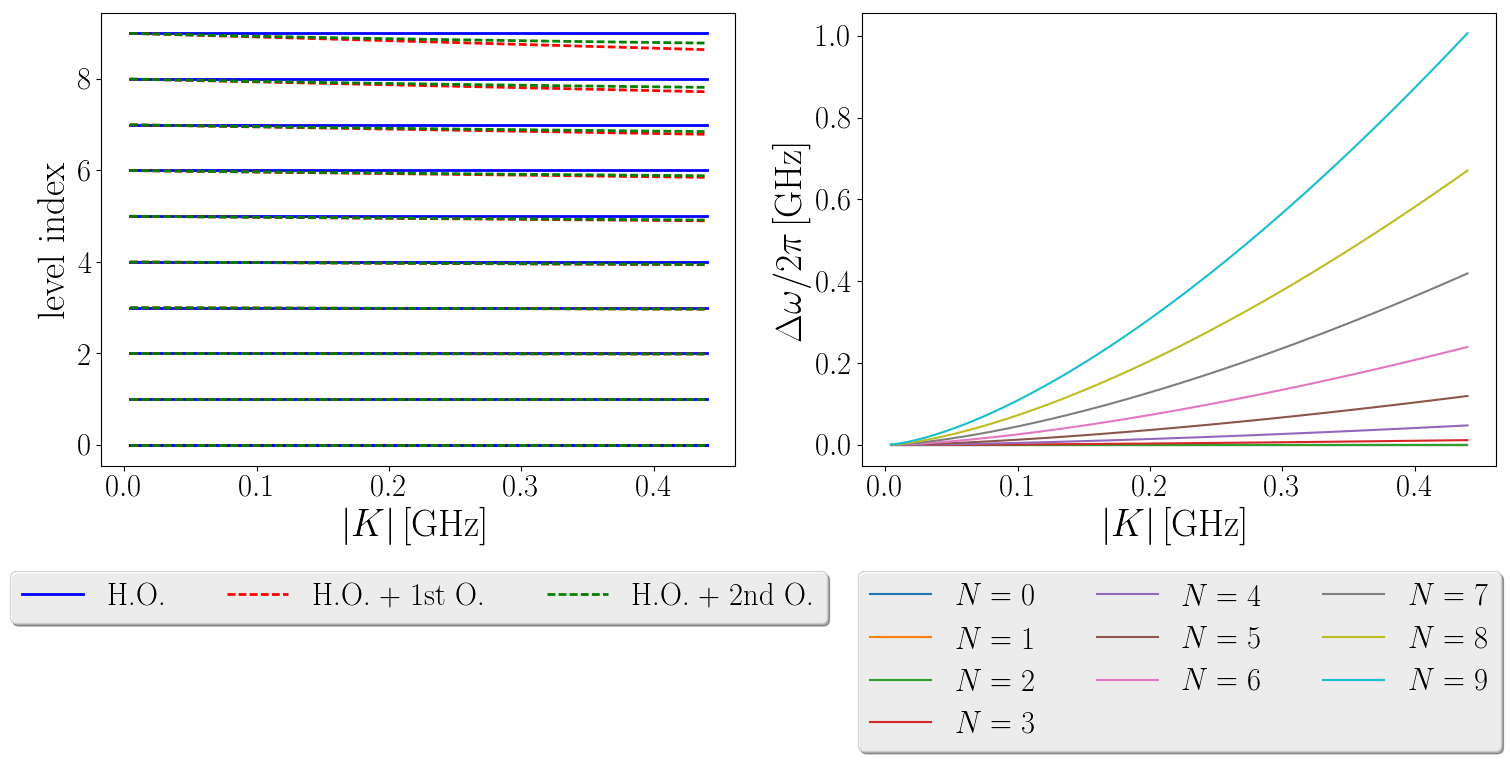

In [68]:
figEnergy_Kerr_SO, axes = plt.subplots(1,2, figsize = (18,6))
#axes[1,0].set_title(r'energy spectrum', fontsize = labelsize)
axes[0].set_ylabel(r'level index',fontsize = labelsize)
axes[0].set_xlabel(r'$|K|\,\mathrm{[GHz]}$', fontsize = labelsize)
axes[1].set_xlabel(r'$|K|\,\mathrm{[GHz]}$', fontsize = labelsize)
axes[1].set_ylabel(r'$\Delta \omega / 2 \pi\,\mathrm{[GHz]}$', fontsize = labelsize)

axes[0].plot(K11*10**-9, (HO_energies_K[:,0]-HO_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'blue',label = 'H.O.',  lw = 2.)
axes[0].plot(K11*10**-9, (Kerr_energies_K[:,0]-Kerr_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'red', label = 'H.O. + 1st O.', lw = 2., ls = '--')
axes[0].plot(K11*10**-9, (Kerr_energies_SO_K[:,0]-Kerr_energies_SO_K[:,0])/(2.*HO_energies_K[:,0]), color = 'green', label = 'H.O. + 2nd O.', lw = 2., ls = '--')    
#axes[1].plot(K11*10**-9, np.array(HO_energies_K[:,N]-Kerr_energies_K[:,N])/(2.*np.pi*10**9), color = 'black')
axes[1].plot(K11*10**-9, np.array(Kerr_energies_SO_K[:,0]-Kerr_energies_K[:,0])/(2.*np.pi*10**6), color = 'black')


for N in range(n):
    axes[0].plot(K11*10**-9, (HO_energies_K[:,N]-HO_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'blue',  lw = 2.)
    axes[0].plot(K11*10**-9, (Kerr_energies_K[:,N]-Kerr_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'red',  lw = 2., ls = '--')
    axes[0].plot(K11*10**-9, (Kerr_energies_SO_K[:,N]-Kerr_energies_SO_K[:,0])/(2.*HO_energies_K[:,0]), color = 'green',  lw = 2., ls = '--')    
    #axes[1].plot(K11*10**-9, np.array(HO_energies_K[:,N]-Kerr_energies_K[:,N])/(2.*np.pi*10**9), color = 'black')
    axes[1].plot(K11*10**-9, np.array(Kerr_energies_SO_K[:,N]-Kerr_energies_K[:,N])/(2.*np.pi*10**9), label = r'$N = {}$'.format(N))
    #plt.plot(EJEC, hbar*Kerr_energies_SO[:,N], color = 'black')
    #plt.yscale('log')
#axes[0].legend()
axes[0].legend(shadow = 'None', loc = 'upper center', bbox_to_anchor= (0.5,-0.2), ncol = 3 )
axes[1].legend(shadow = 'None', loc = 'upper center', bbox_to_anchor= (0.5,-0.2), ncol = 3)

In [66]:
#figEnergy_Kerr_SO.savefig('energy_Kerr_SO.png', dpi = 200., bbox_to_anchor = 'tight')

In [36]:
EJ/(hbar*10**9)

20.28445671740486

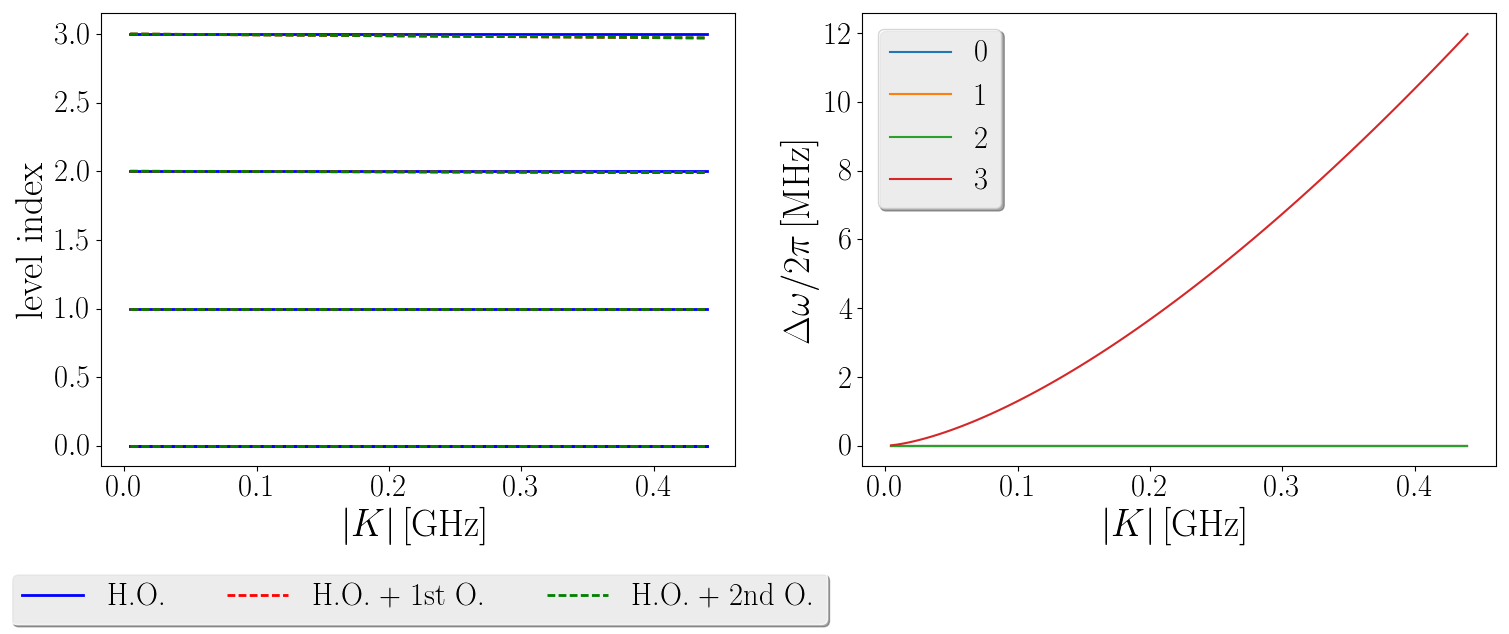

In [64]:
figEnergy_Kerr_SO, axes = plt.subplots(1,2, figsize = (18,6))
#axes[1,0].set_title(r'energy spectrum', fontsize = labelsize)
axes[0].set_ylabel(r'level index',fontsize = labelsize)
axes[0].set_xlabel(r'$|K|\,\mathrm{[GHz]}$', fontsize = labelsize)
axes[1].set_xlabel(r'$|K|\,\mathrm{[GHz]}$', fontsize = labelsize)
axes[1].set_ylabel(r'$\Delta \omega / 2 \pi\,\mathrm{[MHz]}$', fontsize = labelsize)

axes[0].plot(K11*10**-9, (HO_energies_K[:,0]-HO_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'blue', label = 'H.O.',  lw = 2.)
axes[0].plot(K11*10**-9, (Kerr_energies_K[:,0]-Kerr_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'red', label = 'H.O. + 1st O.', lw = 2., ls = '--')
axes[0].plot(K11*10**-9, (Kerr_energies_SO_K[:,0]-Kerr_energies_SO_K[:,0])/(2.*HO_energies_K[:,0]), color = 'green', label = 'H.O. + 2nd O.', lw = 2., ls = '--')    
#axes[1].plot(K11*10**-9, np.array(HO_energies_K[:,N]-Kerr_energies_K[:,N])/(2.*np.pi*10**9), color = 'black')
axes[1].plot(K11*10**-9, np.array(Kerr_energies_SO_K[:,0]-Kerr_energies_K[:,0])/(2.*np.pi*10**6), color = 'black')
    
for N in range(4):
    axes[0].plot(K11*10**-9, (HO_energies_K[:,N]-HO_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'blue', lw = 2.)
    axes[0].plot(K11*10**-9, (Kerr_energies_K[:,N]-Kerr_energies_K[:,0])/(2.*HO_energies_K[:,0]), color = 'red', lw = 2., ls = '--')
    axes[0].plot(K11*10**-9, (Kerr_energies_SO_K[:,N]-Kerr_energies_SO_K[:,0])/(2.*HO_energies_K[:,0]), color = 'green',  lw = 2., ls = '--')    
    #axes[1].plot(K11*10**-9, np.array(HO_energies_K[:,N]-Kerr_energies_K[:,N])/(2.*np.pi*10**9), color = 'black')
    axes[1].plot(K11*10**-9, np.array(Kerr_energies_SO_K[:,N]-Kerr_energies_K[:,N])/(2.*np.pi*10**6), label = '{}'.format(N))
    #plt.plot(EJEC, hbar*Kerr_energies_SO[:,N], color = 'black')
    #plt.yscale('log')
axes[0].legend(facecolor= 'white', edgecolor = 'white', shadow = 'False',frameon = 'False',  loc = 'upper center', bbox_to_anchor= (0.5,-0.2), ncol = 3 )
axes[1].legend()

In [63]:
plt.legend?

In [ ]:
axes[0].legend